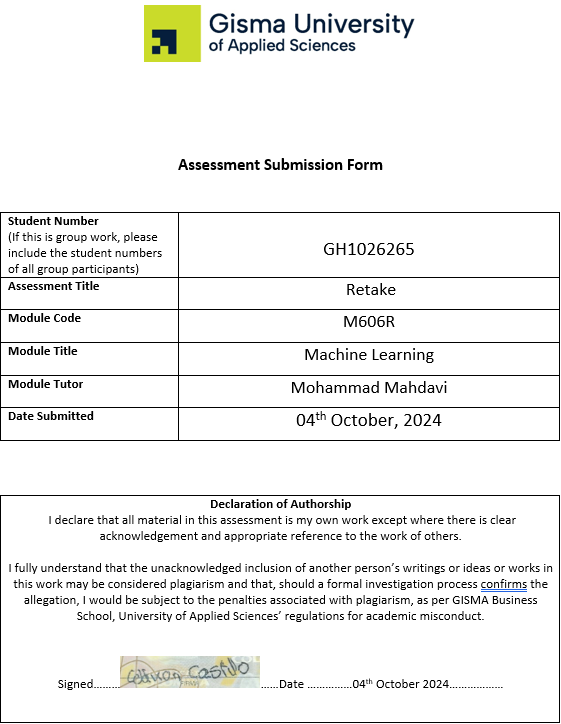

# INTRODUCTION
The objective of this project is to show the knowledge acquired in the Machine Learning course, through solving a classification problem and comparing the results obtained from the techniques used to solve it.

Knowing that a movie is conisdered profitable if its revenue is at least twice bigger than its budget [1], there are three types of **box office performance** values to be considered as follows:


*   flop : if the revenue is lower than 2 times budget <br>
*   average : if the revenue is between 2 and 2.6 times budget . The 2.6 value is subjective
*   hit: if the revenue is greater than 2.6 times budget

The present project is focused on using machine learning techniques to predcit the **box office performance** of a movie, given a set of features such gross, budget, genre, etc.

The datasource that will be used to perform the analysis can be downloaded from [here](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies). <br>

The source code for this solution will be avaible in this [repository](https://github.com/eddixoncu/GISMA_ML_Final).

# IMPORTING REQUIRED LIBRARIES

In [83]:
import matplotlib.pyplot as plts
import numpy as np
import pandas as pd
import seaborn as snss
import sklearn.compose
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.svm

from dateutil import parser
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## GATHERING THE DATA
The TMDb (The Movie Database) is a comprehensive movie database that provides information about movies, including details like titles, ratings, release dates, revenue, genres, and much more.

The dataset consist of a collection of 1,000,000 records from the TMDB database. These records are describeb by 24 features [4]:

*   Id: Unique identifier for each movie. (type: int)

*   title: Title of the movie. (type: str)

*   vote_average: Average vote or rating given by viewers. (type: float)

*   vote_count: Total count of votes received for the movie. (type: int)

*   status: The status of the movie (e.g., Released, Rumored, Post Production, etc.). (type: str)

*   release_date: Date when the movie was released. (type: str)

*   revenue: Total revenue generated by the movie. (type: int)

*   runtime: Duration of the movie in minutes. (type: int)

*   adult: Indicates if the movie is suitable only for adult audiences. (type: bool)

*   backdrop_path: URL of the backdrop image for the movie. (type: str)

*   budget: Budget allocated for the movie. (type: int)

*   homepage: Official homepage URL of the movie. (type: str)

*   imdb_id: IMDb ID of the movie. (type: str)

*   original_language: Original language in which the movie was produced. (type: str)

*   original_title: Original title of the movie. (type: str)

*   overview: Brief description or summary of the movie. (type: str)

*   popularity : Popularity score of the movie. (type: float)

*   poster_path: URL of the movie poster image. (type: str)

*   tagline: Catchphrase or memorable line associated with the movie. (type: str)

*   genres: List of genres the movie belongs to. (type: str)

*   production_companies: List of production companies involved in the movie. (type: str)

*   production_countries: List of countries involved in the movie production. (type: str)

*   spoken_languages:List of languages spoken in the movie. (type: str)

*   keywords: Keywords associated with the movie. Do `.split(", ")` to convert to a list. (type: str)

Regarding Github has a limit of size of 100 Mb, a sample of 13K records were selected using Excel, and then stored in a file called *movies.csv* available in the [repository](https://github.com/eddixoncu/GISMA_ML_Final).



First view of the data using excel locally.

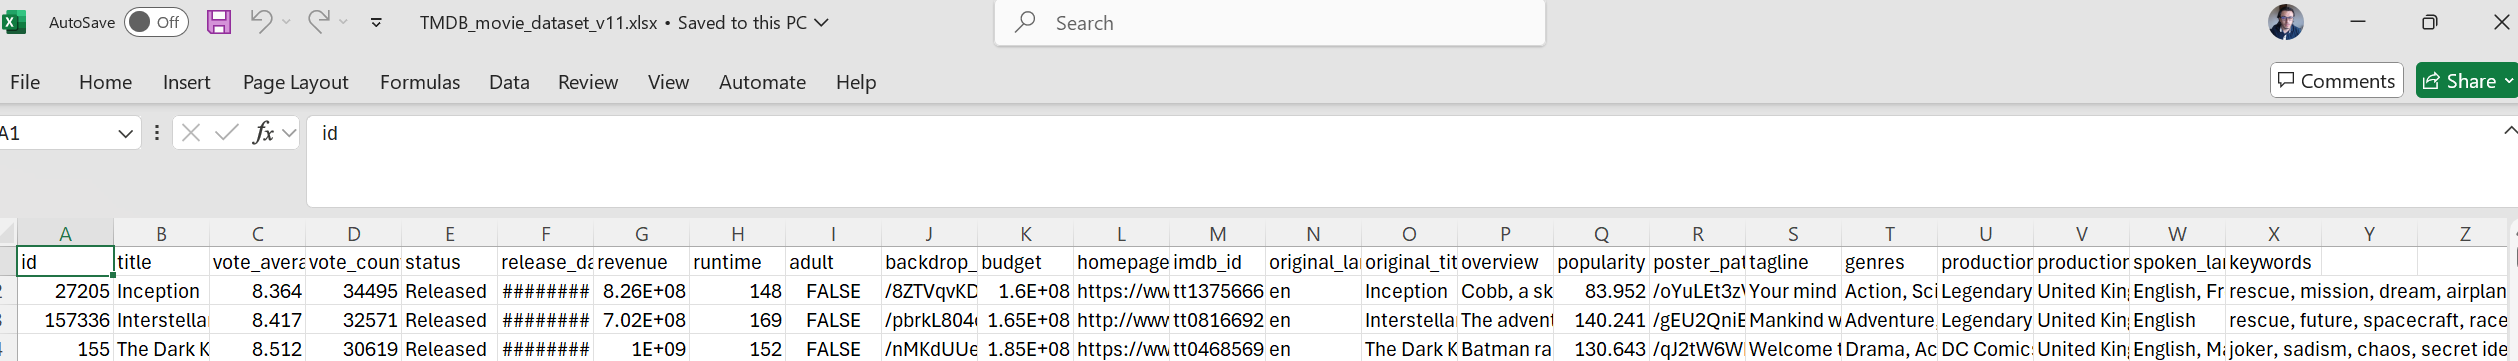

## EXPLORING THE DATA

In [84]:
df_initial = pd.read_csv('https://raw.githubusercontent.com/eddixoncu/GISMA_ML_Final/refs/heads/main/movies.csv')

In [85]:
#pd.set_option("display.max_columns", None)
df_initial.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,15/07/2010,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,05/11/2014,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,16/07/2008,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


In [86]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13333 entries, 0 to 13332
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13333 non-null  int64  
 1   title                 13333 non-null  object 
 2   vote_average          13333 non-null  float64
 3   vote_count            13333 non-null  int64  
 4   status                13333 non-null  object 
 5   release_date          13333 non-null  object 
 6   revenue               13333 non-null  int64  
 7   runtime               13333 non-null  int64  
 8   adult                 13333 non-null  bool   
 9   backdrop_path         13307 non-null  object 
 10  budget                13333 non-null  int64  
 11  homepage              4945 non-null   object 
 12  imdb_id               13321 non-null  object 
 13  original_language     13333 non-null  object 
 14  original_title        13333 non-null  object 
 15  overview           

Describing numerical information

In [87]:
df_initial.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13333.0,1.922315e+05,2.459840e+05,2.000,10958.000,41154.000,3.593640e+05,1.151534e+06
vote_average,13333.0,6.570584e+00,8.167236e-01,1.964,6.030,6.600,7.165000e+00,9.200000e+00
vote_count,13333.0,1.377378e+03,2.601925e+03,164.000,256.000,474.000,1.234000e+03,3.449500e+04
revenue,13333.0,4.955423e+07,1.378637e+08,0.000,0.000,2534122.000,3.619278e+07,2.923706e+09
runtime,13333.0,1.037878e+02,2.429625e+01,0.000,92.000,102.000,1.150000e+02,5.660000e+02
budget,13333.0,1.721995e+07,3.451466e+07,0.000,0.000,2000000.000,2.000000e+07,4.600000e+08
popularity,13333.0,2.081054e+01,5.463865e+01,0.600,10.446,14.136,2.050700e+01,2.994357e+03


In [88]:
df_initial.describe(include=[object])

,title,status,release_date,backdrop_path,homepage,imdb_id,original_language,original_title,overview,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
count,13333,13333,13333,13307,4945,13321,13333,13333,13318,13327,10283,13324,13221,13305,13324,12428
unique,12796,1,7437,13307,4900,13321,54,12929,13316,13327,10194,2545,11175,1160,1290,12144
top,Return,Released,30/08/2019,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,http://www.naruto-movie.com/,tt1375666,en,Return,"""Loro"", in two parts, is a period movie that c...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Based on a true story.,Comedy,Paramount,United States of America,English,woman director
freq,9,13333,12,1,5,1,9919,9,2,1,7,968,108,6429,7265,44


Checking the existence of null or infite values.

In [89]:
is_null = df_initial.isna().any()
is_null[is_null]

,0
backdrop_path,True
homepage,True
imdb_id,True
overview,True
poster_path,True
tagline,True
genres,True
production_companies,True
production_countries,True
spoken_languages,True


In [90]:
is_inf = df_initial.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

,0


Checking duplicates

In [91]:
duplicates = df_initial[df_initial.duplicated()]
display(duplicates)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords


Regarding the features revenue, budget, and release date are not null, it is possible to create columns for box performance and year.

In [92]:
for index, row in df_initial.iterrows():
    try:
        budget = df_initial.at[index, 'budget']
        revenue = df_initial.at[index, 'revenue']
        if (revenue < budget * 2):
            performance = 'FLOP'
        elif (revenue >= budget * 2 and revenue <= budget * 2.6  ):
            performance = 'AVERAGE'
        else:
            performance = 'HIT'
    except:     # if budget or revenue is empty
        performance = np.nan

    df_initial.at[index, 'bo_performance'] = performance

In [93]:
df_initial[['budget','revenue','bo_performance']]

,budget,revenue,bo_performance
0,160000000,825532764,HIT
1,165000000,701729206,HIT
2,185000000,1004558444,HIT
3,237000000,2923706026,HIT
4,220000000,1518815515,HIT
...,...,...,...
13328,0,0,AVERAGE
13329,0,0,AVERAGE
13330,0,0,AVERAGE
13331,0,0,AVERAGE


In [94]:
df_initial["bo_performance"].value_counts()

,count
bo_performance,
AVERAGE,4775
HIT,4422
FLOP,4136


In [95]:
for index, row in df_initial.iterrows():
    try:
        date = parser.parse(row['release_date'])
        year = date.year
        newDate = f'{date.year}-{date.month}-{date.day}'
    except:     # if release_date is empty
        year = np.nan
        newDate = np.nan

    df_initial.at[index, 'year'] = year
    df_initial.at[index, 'release_date'] = newDate

In [96]:
df_initial[['release_date','year']]

,release_date,year
0,2010-7-15,2010.0
1,2014-5-11,2014.0
2,2008-7-16,2008.0
3,2009-12-15,2009.0
4,2012-4-25,2012.0
...,...,...
13328,2022-4-3,2022.0
13329,1980-5-21,1980.0
13330,2011-5-31,2011.0
13331,2016-9-29,2016.0


Checking values if there values for budget and revenue with zeroes  (0)

In [97]:
count =  [(df_initial['budget'] == 0).sum(), (df_initial['revenue'] == 0).sum()]
count

[5814, 5225]

# CHARTS BEFORE CLEANING DATA

The chart show the most of movies were released after 2000's. So training any algorithm can be biased to this trend. In the other hand, any correction by inflation wont'be considered, therefore the values for revenue and budget will be used 'as is' i.e: as they are reported. So, year feature wouldn't be considered for training.  

---



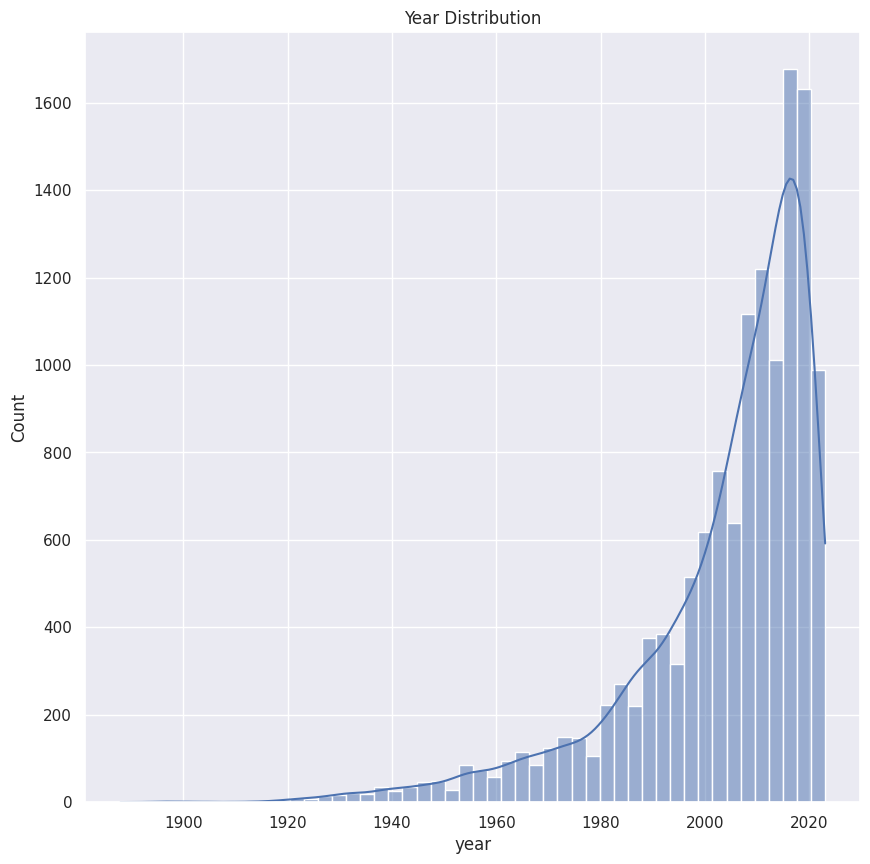

In [98]:
year_Category = df_initial['year']
snss.set_theme(style="darkgrid")
plts.figure(figsize = (10,10))
snss.histplot(data = df_initial, x = year_Category ,kde = True, bins = 50 ,  color = 'b')
plts.title('Year Distribution')
plts.show()

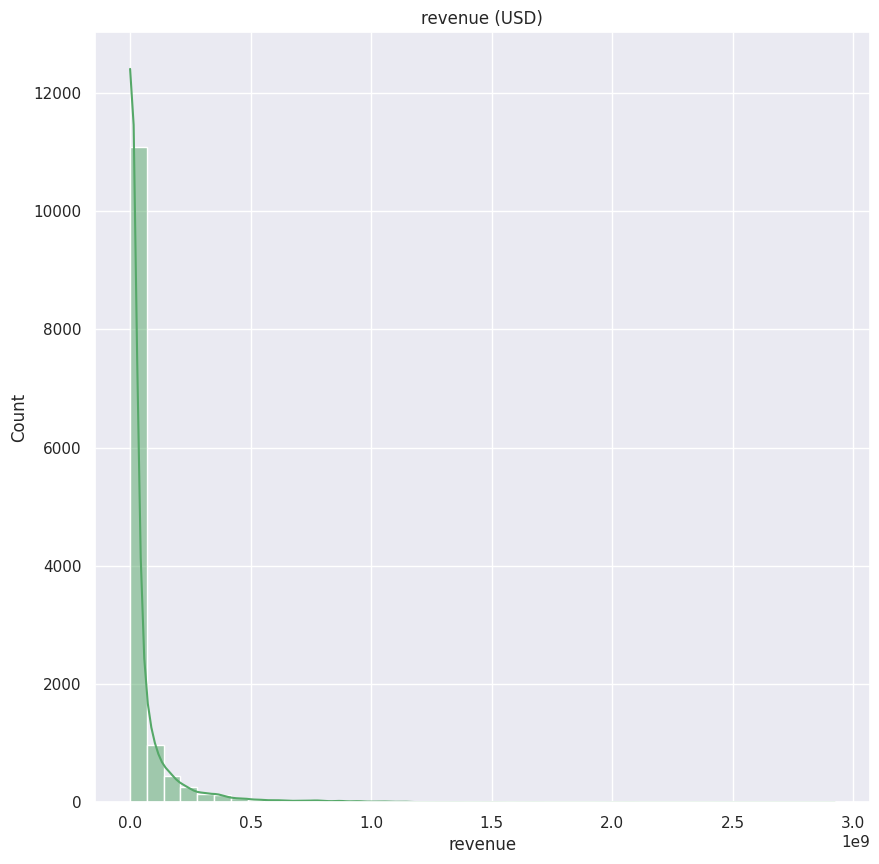

In [99]:
revenue = df_initial['revenue']
snss.set_theme(style="darkgrid")
plts.figure(figsize = (10,10))
snss.histplot(data = df_initial, x = revenue ,kde = True ,bins = 42 ,color = 'g')
plts.title('revenue (USD)')
plts.show()

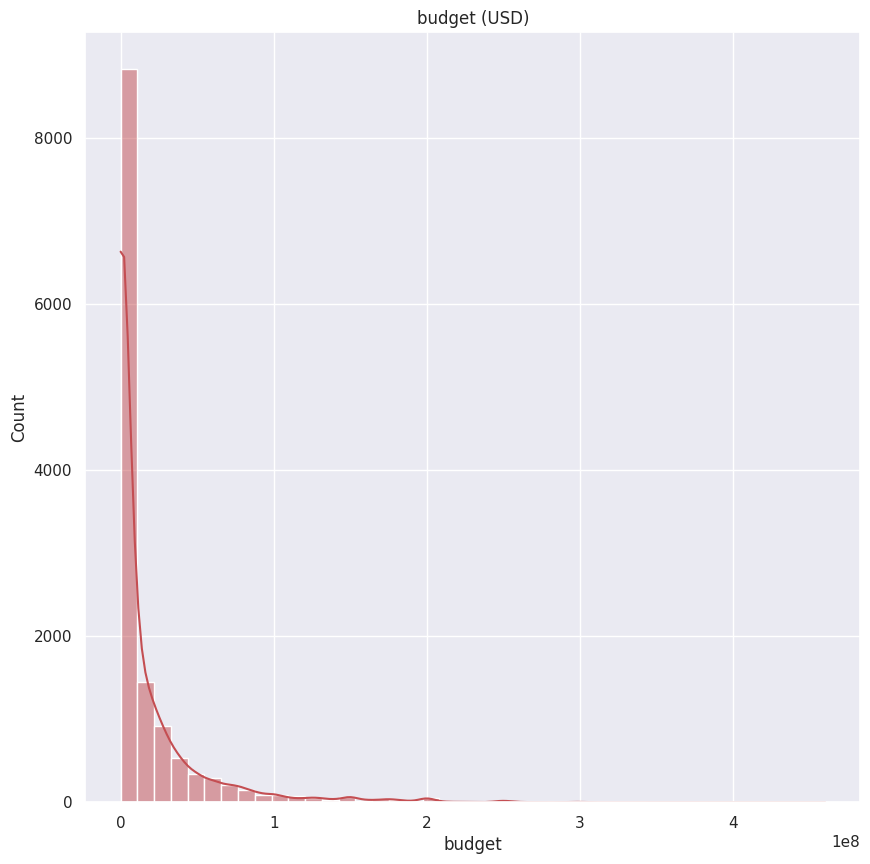

In [100]:
budget = df_initial['budget']
snss.set_theme(style="darkgrid")
plts.figure(figsize = (10,10))
snss.histplot(data = df_initial, x = budget ,kde = True ,bins = 42 ,color = 'r')
plts.title('budget (USD)')
plts.show()

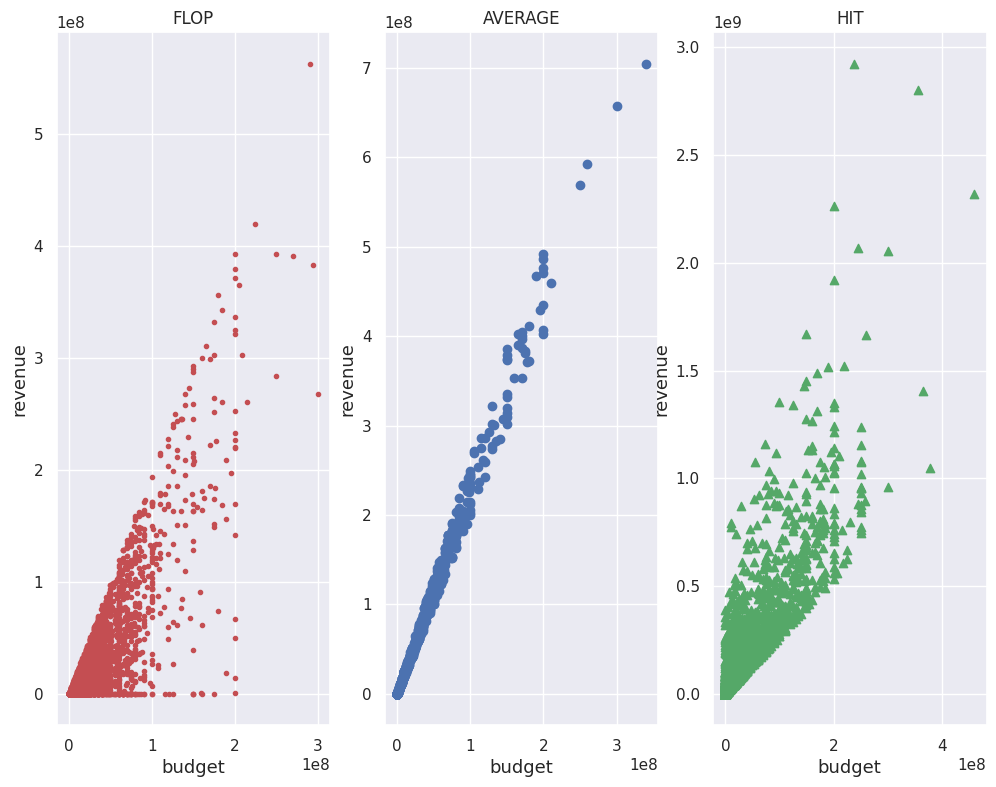

In [101]:
plts.figure(figsize=(12, 9))
plts.subplot(1, 3, 1)
plts.title("FLOP")
plts.scatter(df_initial["budget"][df_initial['bo_performance'] == "FLOP"],    df_initial["revenue"][df_initial['bo_performance'] == "FLOP"],    c="r", marker=".",)
plts.xlabel("budget", fontsize=13)
plts.ylabel("revenue", fontsize=13)
plts.subplot(1, 3, 2)
plts.title("AVERAGE")
plts.scatter(df_initial["budget"][df_initial['bo_performance'] == "AVERAGE"], df_initial["revenue"][df_initial['bo_performance'] == "AVERAGE"], c="b", marker="o")
plts.xlabel("budget", fontsize=13)
plts.ylabel("revenue", fontsize=13)
plts.subplot(1, 3, 3)
plts.title("HIT")
plts.scatter(df_initial["budget"][df_initial['bo_performance'] == "HIT"],     df_initial["revenue"][df_initial['bo_performance'] == "HIT"],     c="g", marker="^")
plts.xlabel("budget", fontsize=13)
plts.ylabel("revenue", fontsize=13)
plts.show()

Acording to the tables and charts, rows whose features 'revenue' or 'budget' have values with zero, must be droped

## Analysing other features

This will discarde because only released movies have gross, also regarding this value is one an unique, doesn't contribute but make noise to the training/prediction process

In [102]:
df_initial["status"].value_counts()

,count
status,
Released,13333


Only non-adult movies will be considered.

In [103]:
df_initial["adult"].value_counts()

,count
adult,
False,13329
True,4


In [104]:
df_initial["adult"].value_counts()

,count
adult,
False,13329
True,4


For this feature, only the first item of each list will be considered as main genre.


In [105]:
df_initial["genres"].value_counts()

,count
genres,
Comedy,968
Drama,818
"Drama, Romance",378
"Comedy, Drama",353
"Comedy, Romance",329
...,...
"Action, Crime, Drama, Mystery",1
"Crime, Thriller, Horror, Comedy",1
"Comedy, Romance, Adventure",1


In [106]:
for index, row in df_initial.iterrows():
    try:
        genres = df_initial.at[index, 'genres']
        genre = genres.split(',')[0]
    except:
        genre = np.nan
    df_initial.at[index, 'genre'] = genre

df_initial["genre"].value_counts()


,count
genre,
Drama,2930
Comedy,2877
Action,1612
Horror,1089
Animation,702
Thriller,686
Adventure,634
Crime,600
Romance,395


<Axes: xlabel='genre'>

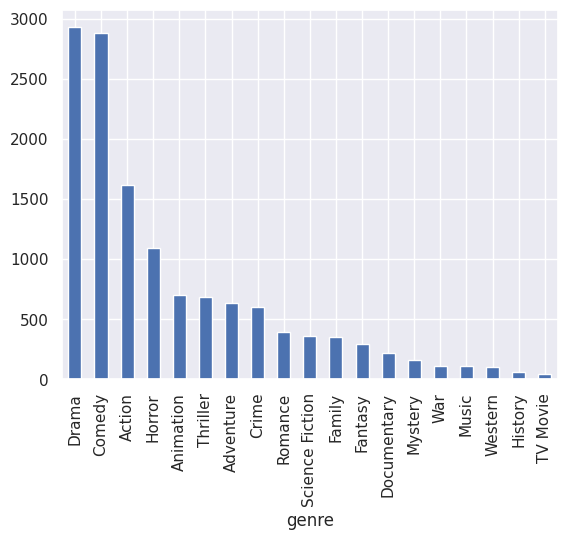

In [107]:
df_initial['genre'].value_counts().plot(kind='bar')

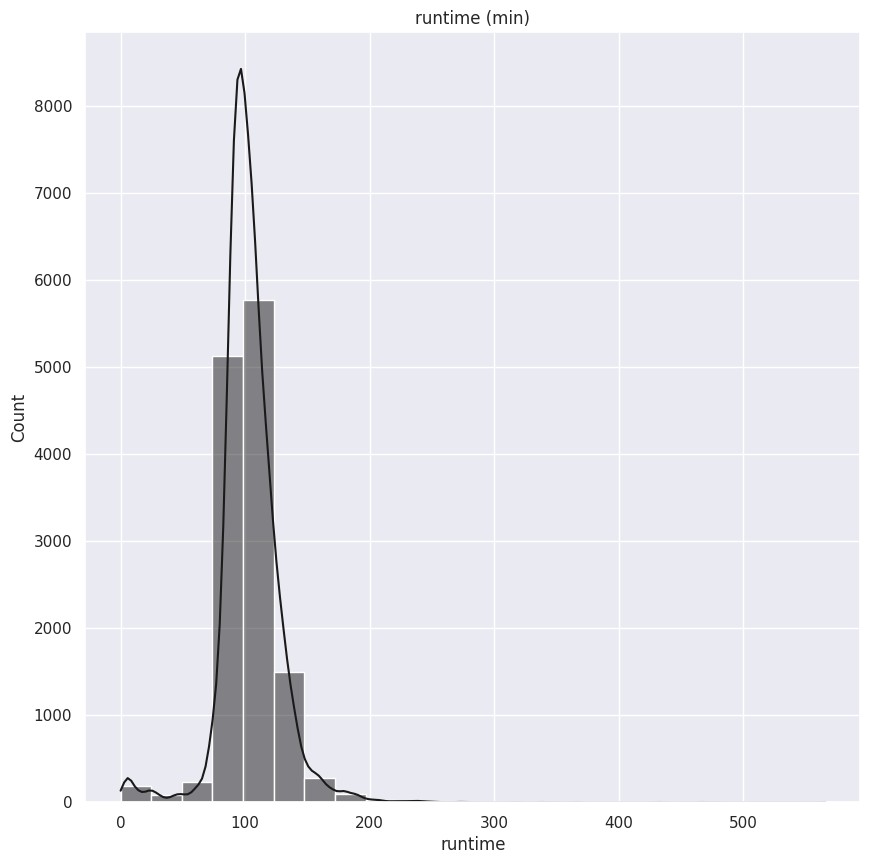

In [108]:
runtime = df_initial['runtime']
snss.set_theme(style="darkgrid")
plts.figure(figsize = (10,10))
snss.histplot(data = df_initial, x = runtime ,kde = True ,bins = 23 ,color = 'k')
plts.title('runtime (min)')
plts.show()

There are a lot of production companies.

In [109]:

for index, row in df_initial.iterrows():
    try:
        production_companies = df_initial.at[index, 'production_companies']
        production_company = production_companies.split(',')[0]
    except:
        production_company = np.nan
    df_initial.at[index, 'production_company'] = production_company


#df_initial["production_company"].value_counts()

In [110]:
df_initial['production_company'].value_counts()


,count
production_company,
Universal Pictures,334
Paramount,321
Columbia Pictures,213
Warner Bros. Pictures,172
Walt Disney Pictures,164
...,...
Agat Films & Cie / Ex Nihilo,1
Santana Pictures Corporation,1
Jack H. Harris Enterprises,1


The features *id, title, vote_count, status, backdrop_path,homepage, imdb_id original_language, original_title, overview, popularity, poster_path,tagline,production_countries,spoken_languages,keywords* won't be included into the analysis, since they are used only for informative purposes or have only one value. On the other hand *genres* and *production_companies*, considering they are "lists", only the first item of each one will be included and be stored in *genre* and *production_campany* respectively.


## Final dataset

In [111]:
df = df_initial.copy()
df = df.drop(columns=['id','title', 'vote_count', 'backdrop_path','homepage', 'imdb_id', 'original_language',
                      'original_title', 'overview', 'popularity', 'poster_path','tagline','production_countries',
                      'genres','production_companies', 'spoken_languages','keywords', 'release_date','status','adult'])
df.head(3)

,vote_average,revenue,runtime,budget,bo_performance,year,genre,production_company
0,8.364,825532764,148,160000000,HIT,2010.0,Action,Legendary Pictures
1,8.417,701729206,169,165000000,HIT,2014.0,Adventure,Legendary Pictures
2,8.512,1004558444,152,185000000,HIT,2008.0,Drama,DC Comics


Deleting null / zeroes values.


In [112]:
df.dropna(inplace=True)
df.shape

(13218, 8)

In [113]:
df.drop(df[df['revenue'] == 0].index, inplace = True)
df.drop(df[df['budget'] == 0].index, inplace = True)
df.drop(df[df['runtime'] == 0].index, inplace = True)
df.shape

(6430, 8)

# SPLITING DATASET

In [114]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_size ",df.shape)
print("dt_train ", df_train.shape)
print("dt_test ", df_test.shape)

df_size  (6430, 8)
dt_train  (4822, 8)
dt_test  (1608, 8)


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote_average,6430.0,6.578117e+00,7.832829e-01,2.719,6.079000e+00,6.6,7.135750e+00,8.707000e+00
revenue,6430.0,9.947183e+07,1.853424e+08,1.000,1.042381e+07,35647635.0,1.044587e+08,2.923706e+09
runtime,6430.0,1.099098e+02,2.060381e+01,5.000,9.600000e+01,106.0,1.200000e+02,3.390000e+02
budget,6430.0,3.377569e+07,4.319044e+07,5.000,7.000000e+06,19500000.0,4.000000e+07,4.600000e+08
year,6430.0,2.002289e+03,1.604731e+01,1915.000,1.995000e+03,2006.0,2.014000e+03,2.023000e+03


In [116]:
df_train.head(3)

,vote_average,revenue,runtime,budget,bo_performance,year,genre,production_company
1433,6.574,63782078,111,30000000,AVERAGE,2011.0,Action,Focus Features
18,8.168,1074458282,122,55000000,HIT,2019.0,Crime,Warner Bros. Pictures
10492,4.985,12840842,89,17000000,FLOP,2002.0,Horror,Focus Features


In [117]:
df_test.head(3)

,vote_average,revenue,runtime,budget,bo_performance,year,genre,production_company
6578,4.559,36433975,89,7000000,HIT,2014.0,Horror,TSG Entertainment
9245,5.544,13000000,99,27000000,FLOP,2004.0,Crime,Paramount
1692,7.232,295038508,108,111000000,HIT,2017.0,Animation,Blue Sky Studios


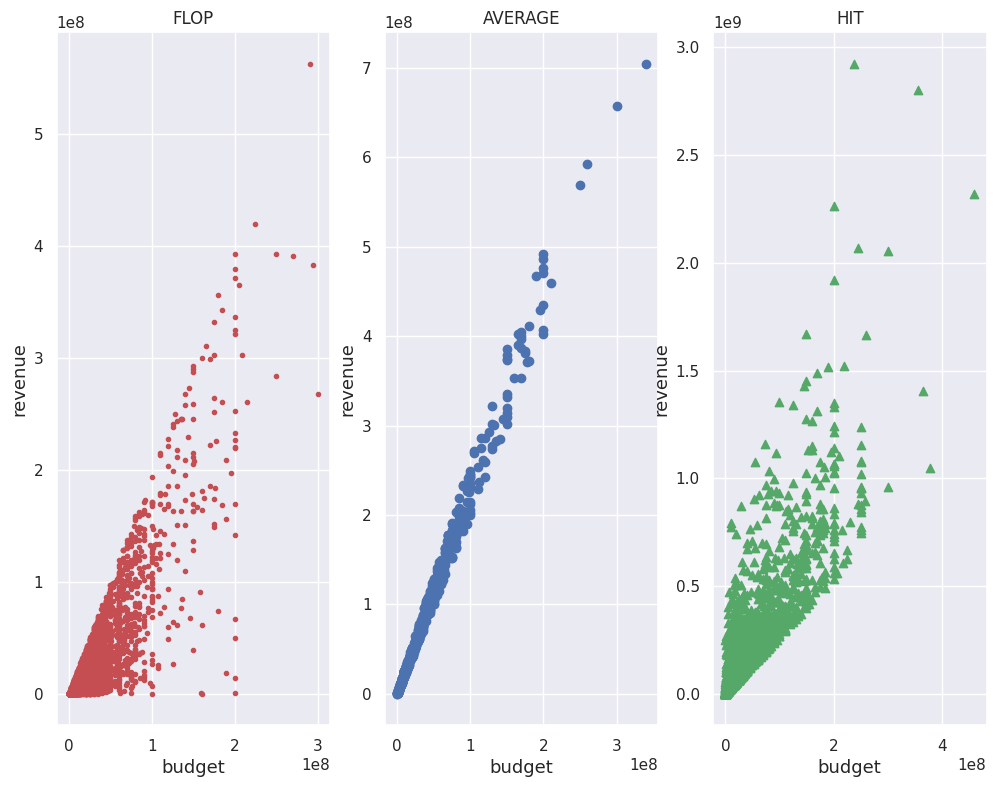

In [118]:
plts.figure(figsize=(12, 9))
plts.subplot(1, 3, 1)
plts.title("FLOP")
plts.scatter(df["budget"][df['bo_performance'] == "FLOP"],    df["revenue"][df['bo_performance'] == "FLOP"],    c="r", marker=".",)
plts.xlabel("budget", fontsize=13)
plts.ylabel("revenue", fontsize=13)
plts.subplot(1, 3, 2)
plts.title("AVERAGE")
plts.scatter(df["budget"][df['bo_performance'] == "AVERAGE"], df["revenue"][df['bo_performance'] == "AVERAGE"], c="b", marker="o")
plts.xlabel("budget", fontsize=13)
plts.ylabel("revenue", fontsize=13)
plts.subplot(1, 3, 3)
plts.title("HIT")
plts.scatter(df["budget"][df['bo_performance'] == "HIT"],     df["revenue"][df['bo_performance'] == "HIT"],     c="g", marker="^")
plts.xlabel("budget", fontsize=13)
plts.ylabel("revenue", fontsize=13)
plts.show()

Creating the training inputs and output

In [119]:

x_train_redux = df_train[['budget','revenue']].copy()
y_train = df_train['bo_performance'].copy()

x_train_redux = pd.DataFrame(x_train_redux, columns=['budget','revenue'])
#y_df_train_reduced = pd.Dataframe(y_df_train_reduced, columns=['bo_performance']
x_train_redux

,budget,revenue
1433,30000000,63782078
18,55000000,1074458282
10492,17000000,12840842
1032,60000000,361366633
5713,350000,11000000
...,...,...
2219,40000000,129540499
3371,12000000,14301505
3326,65000000,128884132
9646,609000,3202000


Creating the test inputs and output

In [120]:
x_test_redux = df_test[['budget','revenue']].copy()
y_test = df_test['bo_performance'].copy()

# USING SVM CLASSIFIER

Training a **Linear SVM Classifier** with only 2 input features

In [121]:
svm_clf = SVC(kernel="linear", C=50)
svm_clf.fit(x_train_redux, y_train)

SVC(C=50, kernel='linear')

In [122]:
y_pred = svm_clf.predict(x_test_redux)
F1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print(F1_score)

0.998756238173828


Training a **Linear SVM Classifie**r with only 2 input features witth a robust scaler.

In [123]:
svm_clf_sc = Pipeline([
        ("scaler", RobustScaler()),
        ("linear_svc", SVC(kernel="linear", C=50)),
    ])

svm_clf_sc.fit(x_train_redux, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('linear_svc', SVC(C=50, kernel='linear'))])

In [124]:
y_pred = svm_clf_sc.predict(x_test_redux)
F1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print(F1_score)

0.9835213380127857


In [125]:
x_train= df_train.drop(columns=['bo_performance'] ).copy()
x_test = df_test.drop(columns=['bo_performance'] ).copy()
y_train = df_train['bo_performance'].copy()
y_test = df_test['bo_performance'].copy()


In [126]:
categorical_attributes = x_train.select_dtypes(include=['object']).columns
categorical_attributes

Index(['genre', 'production_company'], dtype='object')

In [127]:
ct = sklearn.compose.ColumnTransformer([
    ('onet-hot_encoding', sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'), categorical_attributes)
])
ct.fit(x_train)
x_train_encoded = ct.transform(x_train)
x_test_encoded = ct.transform(x_test)

In [128]:
svm_clf = SVC(kernel="rbf", C=50)
svm_clf.fit(x_train_encoded, y_train)

SVC(C=50)

Using the full dataset, it can be observed the F1 measure is negatively impacted. This is due to that not all features are necessary to be included to the training process.

In [129]:
y_pred = svm_clf.predict(x_test_encoded)
F1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print(F1_score)

0.5048634097886495


In the two firsts excecutions, the features were assigned 'a priori', i.e: they were subjetively selected. So it is important to follow a feature selection process. Related work about this can be seen in *Storløkken (2007)* and *Hall and Smith (1997)* .

In [130]:
data_crr = df_train.copy()
data_crr['bo_performance'] = data_crr['bo_performance'].map({'FLOP': 0, 'AVERAGE': 1, 'HIT': 2})
data_crr['genre'] = data_crr['genre'].factorize()[0]
data_crr['production_company'] = data_crr['production_company'].factorize()[0]
data_crr.head(5)

,vote_average,revenue,runtime,budget,bo_performance,year,genre,production_company
1433,6.574,63782078,111,30000000,1,2011.0,0,0
18,8.168,1074458282,122,55000000,2,2019.0,1,1
10492,4.985,12840842,89,17000000,0,2002.0,2,0
1032,5.800,361366633,92,60000000,2,2007.0,3,2
5713,6.300,11000000,85,350000,2,1983.0,2,3


## Feature selection


Below it will be shown tow approarches to select features, using correalation matrix and random forest.
And then with the selected features, a non-linear SVM will be trained, and compared its performance.

### Using correlation matrix and heat maps.
Finding out whether there is correlation between the features

In [131]:
corr_matrix = data_crr.corr()
corr_matrix["bo_performance"].sort_values(ascending=False)

,bo_performance
bo_performance,1.000000
revenue,0.374465
vote_average,0.288205
runtime,0.058958
budget,0.018410
genre,0.013604
production_company,-0.083819
year,-0.158124


In [132]:
corr_matrix

,vote_average,revenue,runtime,budget,bo_performance,year,genre,production_company
vote_average,1.000000,0.185430,0.378159,0.004735,0.288205,-0.170391,0.120924,-0.013600
revenue,0.185430,1.000000,0.228962,0.724556,0.374465,0.159629,0.153939,-0.158672
runtime,0.378159,0.228962,1.000000,0.241204,0.058958,-0.043151,-0.008782,-0.032227
budget,0.004735,0.724556,0.241204,1.000000,0.018410,0.264975,0.167713,-0.166100
bo_performance,0.288205,0.374465,0.058958,0.018410,1.000000,-0.158124,0.013604,-0.083819
year,-0.170391,0.159629,-0.043151,0.264975,-0.158124,1.000000,-0.019167,0.071072
genre,0.120924,0.153939,-0.008782,0.167713,0.013604,-0.019167,1.000000,-0.030367
production_company,-0.013600,-0.158672,-0.032227,-0.166100,-0.083819,0.071072,-0.030367,1.000000


<Axes: >

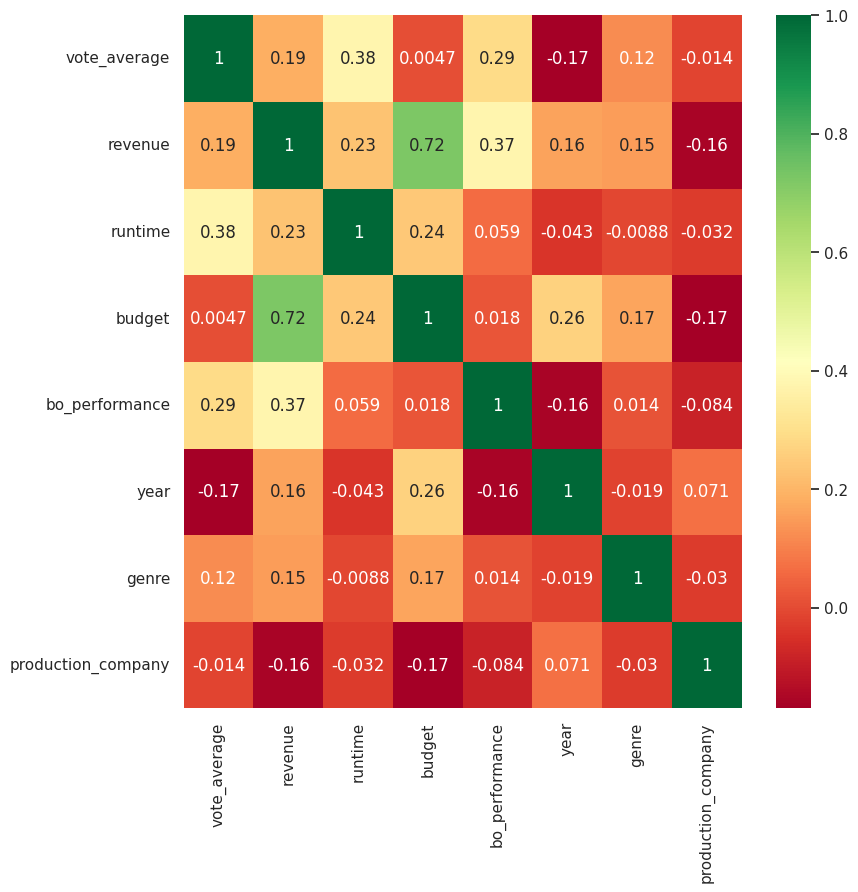

In [133]:
mask = np.zeros(corr_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plts.subplots(figsize=(9,9))
snss.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,cmap='RdYlGn',annot=True)#'RdYlGn'

Using the correlation matrix the candidate features to be considered are:


*   revenue	0.362971
*   vote_average	0.278448
*   runtime	0.040092
*   budget 0.009311

Since their values are greater than  0 (zero) but the closest to 1 are the most suitable to be include in to the training process.




### Using random forest

This method is good to get insights whether a feature is really necessary based in how has been reduced its impurity of nodes in a decision tree.

In [134]:
x_train= df_train.drop(columns=['bo_performance'] ).copy()
x_train['genre'] = x_train['genre'].factorize()[0]
x_train['production_company'] = x_train['production_company'].factorize()[0]
y_train = df_train['bo_performance'].copy()


clf_rnd = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rnd.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [135]:
x_test = df_test.drop(columns=['bo_performance'] ).copy()
x_test['genre'] = x_test['genre'].factorize()[0]
x_test['production_company'] = x_test['production_company'].factorize()[0]
y_test = df_test['bo_performance'].copy()

In [136]:
x_test.head(4)


,vote_average,revenue,runtime,budget,year,genre,production_company
6578,4.559,36433975,89,7000000,2014.0,0,0
9245,5.544,13000000,99,27000000,2004.0,1,1
1692,7.232,295038508,108,111000000,2017.0,2,2
3452,6.000,55041367,130,80000000,2004.0,3,3


In [137]:
y_pred = clf_rnd.predict(x_test)

print("F1 score:", sklearn.metrics.f1_score(y_test, y_pred, average='weighted'))

F1 score: 0.9108777822756327


In [138]:
feature_scores = pd.Series(clf_rnd.feature_importances_, index=x_test.columns).sort_values(ascending=False)
feature_scores

,0
revenue,0.406662
budget,0.265047
vote_average,0.096212
year,0.079222
runtime,0.059542
production_company,0.058074
genre,0.035241


As it can be observed using the based impurity feauture importance , the most relevant features that have incidence in the predictions are *revenue* and *budget* followed by *vote_averge*, *year*, *runtime* while using the correlation approach where the relevant ones are *revenue and vote average*.

## Training a non-linear SVM model

From both approaches the first 4 features will be selected from the dataframe store in the variables **df_train** and **df_test**

In [139]:
# selecting features based on matrix correlation
df_corr = df_train[['revenue','vote_average','runtime','budget', 'bo_performance' ]].copy()
df_corr_test = df_test[['revenue','vote_average','runtime','budget', 'bo_performance' ]].copy()

# Selection features base on random forest
df_rndf = df_train[['revenue','budget','vote_average','year', 'bo_performance' ]].copy()
df_rndf_test = df_test[['revenue','budget','vote_average','year', 'bo_performance' ]].copy()

In [140]:
x_corr_train = df_corr[['revenue','vote_average','runtime','budget', ]].copy()
x_corr_test = df_corr_test[['revenue','vote_average','runtime','budget', ]].copy()
y_corr_test = df_corr_test['bo_performance'].copy()

x_rndf_train = df_rndf[['revenue','budget','vote_average','year', ]].copy()
x_rndf_test = df_rndf_test[['revenue','budget','vote_average','year', ]].copy()
y_rndf_test = df_rndf_test['bo_performance'].copy()

In [141]:
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=1000))
        ])
y_train = df_corr['bo_performance'].copy()
rbf_kernel_svm_clf.fit(x_corr_train, y_train)
y_pred = rbf_kernel_svm_clf.predict(x_corr_test)

In [142]:
print("F1 Score:", sklearn.metrics.f1_score(y_corr_test, y_pred,average='weighted'))

F1 Score: 0.9688309214032933


In [143]:
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=1000))
        ])
y_train = df_rndf['bo_performance'].copy()
rbf_kernel_svm_clf.fit(x_rndf_train, y_train)
y_pred = rbf_kernel_svm_clf.predict(x_rndf_test)

In [144]:
print("F1 Score:", sklearn.metrics.f1_score(y_rndf_test, y_pred,average='weighted'))

F1 Score: 0.9668601246451887


# USING DECISION TREE

Using the selected features gotten from random forest:
*'revenue','budget','vote_average','year', 'bo_performance'*

In [145]:
dtree_train = df_train[['revenue','vote_average','runtime','budget', 'bo_performance' ]].copy()
x_train= dtree_train.drop(columns=['bo_performance'] ).copy()
y_train = dtree_train['bo_performance'].copy()

dtree_test =df_test[['revenue','vote_average','runtime','budget', 'bo_performance' ]].copy()
x_test = dtree_test.drop(columns=['bo_performance'] ).copy()
y_test = df_test['bo_performance'].copy()

In [146]:
dtre_classifier = DecisionTreeClassifier()
dtre_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [147]:
y_pred = dtre_classifier.predict(x_test)
F1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print(F1_score)

0.9623883664855296


In [148]:
dtre_classifier = DecisionTreeClassifier( max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dtre_classifier.fit(x_train, y_train)
y_pred = dtre_classifier.predict(x_test)
F1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print(F1_score)

0.955302341426999


# USING KNN

In [149]:
# Using the selected features gotten from random forest:
# 'revenue','budget','vote_average','year', 'bo_performance'
knn_train = df_train[['revenue','vote_average','runtime','budget', 'bo_performance' ]].copy()
x_train= knn_train.drop(columns=['bo_performance'] ).copy()
y_train = knn_train['bo_performance'].copy()

knn_test =df_test[['revenue','vote_average','runtime','budget', 'bo_performance' ]].copy()
x_test = knn_test.drop(columns=['bo_performance'] ).copy()
y_test = knn_test['bo_performance'].copy()

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
F1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", F1_score)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

F1 Score: 0.9731824583256312


# CONCLUSIONS

# REFERENCES LIST





[1] https://www.popmatters.com/192562-box-office-flops-or-building-the-perfect-bomb-2495539022.html

[2] https://www.a24.com/peliculas/cuando-una-pelicula-es-rentable-en-el-cine

[3] https://www.quanthub.com/how-to-read-a-correlation-heatmap/

[4] https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

[5] Storløkken, R., 2007. Labelling clusters in an anomaly based ids by means of clustering quality indexes (Master's thesis). Available at https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/143839/Storl%C3%B8kken%20-%20Labelling%20clusters%20in%20an%20anomaly%20based%20IDS%20by%20means%20of%20clustering%20quality%20indexes.pdf?sequence=1

[6]Hall, M.A. and Smith, L.A., 1997;. Feature subset selection: a correlation based filter approach. Avialable at https://researchcommons.waikato.ac.nz/server/api/core/bitstreams/6c161c37-fe54-4bf3-9200-425e5f90f457/content

In [150]:
#%%shell
#jupyter nbconvert --to html /content/movies.ipynb